# Capstone Example

You will be working on 4 tasks:
1. __Data Processing__ 
2. __Classification__ 
3. __Regression__ 
4. __Recommender Sytstems__

# Task 1: Data Processing

## The Data

https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

Context
Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

Content
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

Age: Positive Integer variable of the reviewers age.

Title: String variable for the title of the review.

Review Text: String variable for the review body.

Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

Division Name: Categorical name of the product high level division.

Department Name: Categorical name of the product department name.

Class Name: Categorical name of the product class name.

Acknowledgements
Anonymous but real source

Inspiration
I look forward to come quality NLP! There is also some great opportunities for feature engineering, and multivariate analysis.

Publications
Statistical Analysis on E-Commerce Reviews, with Sentiment Classification using Bidirectional Recurrent Neural Network

by Abien Fred Agarap - Github


### First Step: Imports

In the next cell we will give you all of the imports you should need to do your project. Feel free to add more if you would like, but these should be sufficient.

In [1]:
import gzip
from collections import defaultdict
import random
import numpy
import scipy.optimize
import string
from sklearn import linear_model
from nltk.stem.porter import PorterStemmer # Stemming
import pandas as pd

### TODO 1: Read the data and Fill your dataset



In [2]:
dataset = pd.read_csv("Womens_Clothing E-Commerce_Reviews.csv")

In [3]:
dataset.shape

(23486, 11)

In [4]:
dataset.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [5]:
dataset.head(5)
dataset = dataset.drop('Unnamed: 0', 1)

In [6]:
dataset.head(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
# Title, Review Text, Division name, Department Name and Class Name columns have missing valuess
dataset.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
dataset.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [9]:
dataset.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [10]:
print("Mean rating {}".format(dataset['Rating'].mean()))

Mean rating 4.196031678446734


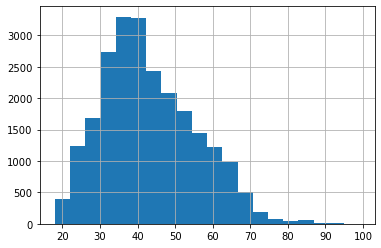

In [11]:
dataset['Age'].hist(bins=20)

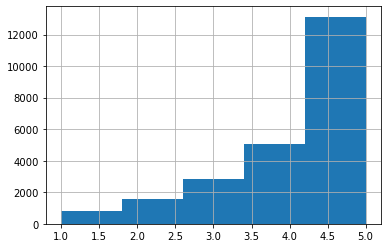

In [12]:
dataset['Rating'].hist(bins=5)

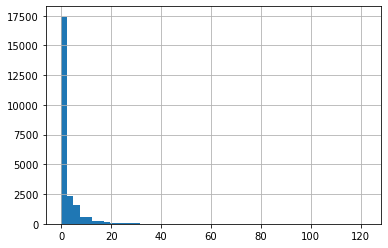

In [13]:
dataset['Positive Feedback Count'].hist(bins=50)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

df = dataset.copy()

mean = df['Rating'].mean()
mean

# Rating of 4.19 (mean) or higher -> positive
# Rating of below 4.19 (mean) -> negative 
df['Sentiment'] = df['Rating'] >= mean

# combine review title and review text
df['Title_Text'] = df['Title'] + " " + df['Review Text']

# drop the original title and review text column
df.drop(['Title', 'Review Text'], axis=1, inplace=True)

# drop nan rows with respect to new Title_Text column
df

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment,Title_Text
0,767,33,4,1,0,Initmates,Intimate,Intimates,False,NaN
1,1080,34,5,1,4,General,Dresses,Dresses,True,NaN
2,1077,60,3,0,0,General,Dresses,Dresses,False,Some major design flaws I had such high hopes ...
3,1049,50,5,1,0,General Petite,Bottoms,Pants,True,"My favorite buy! I love, love, love this jumps..."
4,847,47,5,1,6,General,Tops,Blouses,True,Flattering shirt This shirt is very flattering...
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,5,1,0,General Petite,Dresses,Dresses,True,Great dress for many occasions I was very happ...
23482,862,48,3,1,0,General Petite,Tops,Knits,False,Wish it was made of cotton It reminds me of ma...
23483,1104,31,3,0,1,General Petite,Dresses,Dresses,False,"Cute, but see through This fit well, but the t..."
23484,1084,28,3,1,2,General,Dresses,Dresses,False,"Very cute dress, perfect for summer parties an..."


In [15]:
df.dropna(subset = ["Title_Text"], inplace=True)

In [16]:
df['review_length'] = df["Title_Text"].apply(len)

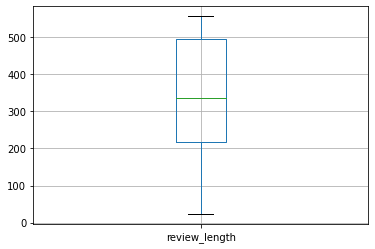

In [17]:
df.boxplot(column=['review_length'])

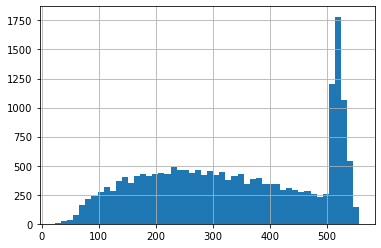

In [18]:
df['review_length'].hist(bins=50)

In [19]:
df['Sentiment'].value_counts()

True     10871
False     8804
Name: Sentiment, dtype: int64

### Preprocessing review comments

In [20]:
import nltk
import regex as re
from collections import Counter

vocab_size = 2500

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
table = str.maketrans('', '', string.punctuation)
porter = nltk.stem.porter.PorterStemmer()
stop_words = set(nltk.corpus.stopwords.words('english')) 

def clean_text(text):
    #lower case
    text = text.lower()
    
    #remove only numbers
    text = re.sub("\d+", " ", text)
    
    #tokenize the sentence to words
    words = w_tokenizer.tokenize(text)
    
    #remove punctuations
    punctuation_stripped = [w.translate(table) for w in words]
    
    #lematize
    lemmatize = [lemmatizer.lemmatize(w) for w in punctuation_stripped]
    
    #remove stopwords
    without_stopwords = [w for w in lemmatize if not w in stop_words] 
    
    #remove short words
    without_shortwords = [w for w in without_stopwords if len(w) > 3] 
    
    #stem the word
    #stemmed = [porter.stem(word) for word in lemmatize]
    
    return " ".join(without_shortwords)

df['Cleaned_Review'] = df["Title_Text"].apply(clean_text)


most_common = Counter(" ".join(df["Cleaned_Review"]).split()).most_common(vocab_size)
popular_words = [k for (k, v) in most_common]
def keep_most_common(text):
    words = w_tokenizer.tokenize(text)
    #keep only most common words
    only_mostcommon = [w for w in words if w in popular_words] 
    return " ".join(only_mostcommon)

df['Cleaned_Review'] = df["Cleaned_Review"].apply(keep_most_common)

In [21]:
pd.set_option('display.max_colwidth', 85)

df[["Title_Text", "Cleaned_Review"]][0:10]

,Title_Text,Cleaned_Review
2,Some major design flaws I had such high hopes for this dress and really wanted it...,major design flaw high hope dress really wanted work initially ordered petite sma...
3,"My favorite buy! I love, love, love this jumpsuit. it's fun, flirty, and fabulous...",favorite love love love jumpsuit flirty fabulous every time wear nothing great co...
4,Flattering shirt This shirt is very flattering to all due to the adjustable front...,flattering shirt shirt flattering adjustable front perfect length wear legging sl...
5,"Not for the very petite I love tracy reese dresses, but this one is not for the v...",petite love tracy reese dress petite foot tall usually wear brand dress pretty pa...
6,Cagrcoal shimmer fun I aded this in my basket at hte last mintue to see what it w...,shimmer basket last would look like person store pick went color pale color reall...
7,"Shimmer, surprisingly goes with lots I ordered this in carbon for store pick up, ...",shimmer surprisingly ordered carbon store pick stuff always used pair skirt pant ...
8,Flattering I love this dress. i usually get an xs but it runs a little snug in bu...,flattering love dress usually little snug bust ordered size flattering feminine u...
9,"Such a fun dress! I'm 5""5' and 125 lbs. i ordered the s petite to make sure the l...",dress ordered petite make sure length wasnt long typically wear regular retailer ...
10,Dress looks like it's made of cheap material Dress runs small esp where the zippe...,dress look like made cheap material dress small zipper area ordered typically tig...
12,Perfect!!! More and more i find myself reliant on the reviews written by savvy sh...,perfect find review written shopper past right product case doubt would even trie...


In [22]:
vectorizer = CountVectorizer()
# split data for training and testing, stratify with sentify positive or negative
train_data,test_data = train_test_split(df, train_size=0.8, random_state=0, stratify=df['Sentiment'], shuffle=True)

# Task 2: Classification

In [88]:
X_train = vectorizer.fit_transform(train_data['Cleaned_Review'])
y_train = train_data['Sentiment']

X_test = vectorizer.transform(test_data['Cleaned_Review'])
y_test = test_data['Sentiment']

In [89]:
X_train.shape

(15740, 2500)

In [90]:
y_train.shape

(15740,)

### LogisticRegression

In [91]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [92]:
y_pred = lr.predict(X_test)

#### Compute Accuracy of Your Model

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1319,  442],
       [ 352, 1822]], dtype=int64)

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.79      0.75      0.77      1761
        True       0.80      0.84      0.82      2174

    accuracy                           0.80      3935
   macro avg       0.80      0.79      0.79      3935
weighted avg       0.80      0.80      0.80      3935



In [95]:
pd.DataFrame(zip(y_test.values, y_pred), columns=['true','predicted'])[20:30]

,true,predicted
20,False,False
21,False,False
22,True,False
23,True,True
24,False,True
25,False,False
26,False,True
27,True,True
28,False,True
29,True,True


### MultinomialNB

In [96]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [97]:
y_pred = mnb.predict(X_test)

#### Compute Accuracy of Your Model

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)#### Compute Accuracy of Your Model

array([[1349,  412],
       [ 336, 1838]], dtype=int64)

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.77      0.78      1761
        True       0.82      0.85      0.83      2174

    accuracy                           0.81      3935
   macro avg       0.81      0.81      0.81      3935
weighted avg       0.81      0.81      0.81      3935



In [100]:
pd.DataFrame(zip(y_test.values, y_pred), columns=['true','predicted'])[20:30]

,true,predicted
20,False,False
21,False,False
22,True,False
23,True,False
24,False,False
25,False,False
26,False,False
27,True,True
28,False,True
29,True,False


### MLPClassifier

In [101]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(512,256,128,32))
#nn.fit(X_train,y_train)

In [102]:
#y_pred = nn.predict(X_test)

#### Compute Accuracy of Your Model

In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1349,  412],
       [ 336, 1838]], dtype=int64)

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.77      0.78      1761
        True       0.82      0.85      0.83      2174

    accuracy                           0.81      3935
   macro avg       0.81      0.81      0.81      3935
weighted avg       0.81      0.81      0.81      3935



In [105]:
pd.DataFrame(zip(y_test.values, y_pred), columns=['true','predicted'])[20:30]

,true,predicted
20,False,False
21,False,False
22,True,False
23,True,False
24,False,False
25,False,False
26,False,False
27,True,True
28,False,True
29,True,False


### Tensorflow Classifier using embedding

In [106]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Flatten, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.pipeline import Pipeline
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.base import BaseEstimator, TransformerMixin

class MyTokenizerTransformer(BaseEstimator,  Tokenizer):
    def __init__(self, **tokenizer_params):
        Tokenizer.__init__(self, **tokenizer_params)
    def fit(self, X, y=None):
        self.fit_on_texts(X)
        return self
    def transform(self, X, y=None):
        X_transformed = self.texts_to_sequences(X)
        return X_transformed


class MyPadSequencesTransformer(BaseEstimator):
    def __init__(self, maxlen):
        self.maxlen = maxlen
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_padded = pad_sequences(X, maxlen=self.maxlen, padding="pre")
        return X_padded

maxlen=128
my_tokenizer = MyTokenizerTransformer()
my_padder = MyPadSequencesTransformer(maxlen=maxlen)


def build_model():
    model = Sequential()
    model.add(Embedding(vocab_size + 1, 16, input_length=maxlen))
    model.add(GRU(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
pipe = Pipeline([('tokenizer', my_tokenizer), 
                 ('padder', my_padder),
                 ('model', KerasClassifier(build_fn=build_model, 
                                           epochs=50, verbose=1, 
                                           batch_size=128,
                                           validation_split=0.1, callbacks=[es]))
                ])

xtrain = train_data['Cleaned_Review']
ylabels = train_data['Sentiment'].astype('category').cat.codes

history = pipe.fit(xtrain, ylabels)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 128, 16)           40016     
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                15744     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 57,873
Trainable params: 57,873
Non-trainable params: 0
_________________________________________________________________
None
Train on 14166 samples, validate on 1574 samples
Epoch 1/50
14166/14166 [==============================] - 16s 

In [107]:
xtest = test_data['Cleaned_Review']
y_pred = pipe.predict(xtest)

3935/3935 [==============================] - 1s 367us/sample


#### Compute Accuracy of Your Model

In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1356,  405],
       [ 409, 1765]], dtype=int64)

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.77      0.77      0.77      1761
        True       0.81      0.81      0.81      2174

    accuracy                           0.79      3935
   macro avg       0.79      0.79      0.79      3935
weighted avg       0.79      0.79      0.79      3935



In [110]:
pd.DataFrame(zip(y_test.values, y_pred), columns=['true','predicted'])[20:30]

,true,predicted
20,False,[1]
21,False,[0]
22,True,[0]
23,True,[1]
24,False,[0]
25,False,[0]
26,False,[0]
27,True,[1]
28,False,[0]
29,True,[1]


# Task 3: Regression

### Predict the ratings given choosen input features

In [42]:
train_data.head(5)

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment,Title_Text,review_length,Cleaned_Review
11395,1022,33,5,1,2,General,Bottoms,Jeans,True,My new favorite jeans These jeans look great with everything and fit great. i can...,209,favorite jean jean look great everything great dress wedge throw flip flop comfor...
3661,872,39,5,1,1,General Petite,Tops,Knits,True,"Cute This little number is really cute, i got it on sale, after i looked at it, w...",232,cute little number really cute sale looked went home decided wear trouser jean bl...
6360,1059,65,5,1,16,General,Bottoms,Pants,True,"Another charlie winner I am not really a ""print person"" but cartonnier gets it ri...",524,another charlie winner really print person cartonnier right every time modern pri...
4177,860,46,4,1,0,General Petite,Tops,Knits,False,"Colorful, pretty shirt Casual, pretty. runs a little large, especially through th...",120,colorful pretty shirt casual pretty little large especially waist great comfortab...
21014,1078,54,1,0,0,General,Dresses,Dresses,False,Disappointed with fit This is one of those dresses that looks so cute on the mode...,233,disappointed dress look cute model doesnt look anything like reality shape weirdl...


In [43]:
X_train = train_data[['Clothing ID','Age','Recommended IND','Positive Feedback Count','review_length']]
y_train = train_data['Rating']
X_test = test_data[['Clothing ID','Age','Recommended IND','Positive Feedback Count','review_length']]
y_test = test_data['Rating']

### HuberRegressor

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

pipe = Pipeline([('scaler', StandardScaler()), ('huber', linear_model.HuberRegressor())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('huber', HuberRegressor())])

In [45]:
y_test_pred = pipe.predict(X_test)

#### model evaluation

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test.values, y_test_pred)

0.6243611988722411

In [47]:
pd.DataFrame(zip(y_test.values, y_test_pred), columns=['true','predicted'])[20:30]

,true,predicted
20,3,2.381836
21,4,4.782184
22,5,4.808351
23,5,4.749819
24,3,2.399860
25,4,4.678128
26,3,4.762247
27,5,4.675699
28,4,4.774515
29,5,4.767519


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

pipe = Pipeline([('scaler', StandardScaler()), ('ridge', linear_model.Ridge(alpha=1))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge(alpha=1))])

In [49]:
y_test_pred = pipe.predict(X_test)

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test.values, y_test_pred)

0.6373098651889113

In [51]:
pd.DataFrame(zip(y_test.values, y_test_pred), columns=['true','predicted'])[20:30]

,true,predicted
20,3,2.285852
21,4,4.657224
22,5,4.685821
23,5,4.631301
24,3,2.297142
25,4,4.562168
26,3,4.645373
27,5,4.559931
28,4,4.656678
29,5,4.645660


# Task 3: Recommendation Systems

MovieLens 1M Dataset

MovieLens 1M movie ratings. Stable benchmark dataset. 1 million ratings from 6000 users on 4000 movies. Released 2/2003.

README.txt

ml-1m.zip (size: 6 MB, checksum)

Permalink: https://grouplens.org/datasets/movielens/1m/


In [52]:
import pandas as pd
from collections import defaultdict

from collections import defaultdict
import scipy
import scipy.optimize
import numpy
import random

In [53]:
ratings = pd.read_csv("ratings.dat",sep="::", header=None)
movies = pd.read_csv("movies.dat",sep="::", header=None)
users = pd.read_csv("users.dat",sep="::", header=None)

C:\Users\Ashok_Potti\.conda\envs\env_ashok\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\Users\Ashok_Potti\.conda\envs\env_ashok\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\Ashok_Potti\.conda\envs\env_ashok\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by 

In [54]:
ratings.shape

(1000209, 4)

In [55]:
movies.shape

(3883, 3)

In [56]:
users.shape

(6040, 5)

In [57]:
ratings.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [58]:
movies.isna().sum()

0    0
1    0
2    0
dtype: int64

In [59]:
users.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [60]:
ratings.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [61]:
ratings.describe()

,0,1,2,3
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [62]:
movies.describe()

,0
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [63]:
users.describe()

,0,2,3
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


RATINGS FILE DESCRIPTION
================================================================================

All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings


In [64]:
ratings.head(5)

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [65]:
ratings.head(5)

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


MOVIES FILE DESCRIPTION
================================================================================

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western


In [66]:
movies.head(5)

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


USERS FILE DESCRIPTION
================================================================================

User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"



In [67]:
users.head(5)

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [68]:
dataset=ratings[[0,1,2]]
dataset = dataset.rename(columns={0: "userId", 1: "movieId", 2 : "rating"})

In [69]:
dataset

,userId,movieId,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
1000204,6040,1091,1
1000205,6040,1094,5
1000206,6040,562,5
1000207,6040,1096,4


In [70]:
print("Unique Users {}, Unique Moviews {}".format(dataset.userId.nunique(),dataset.movieId.nunique()))

Unique Users 6040, Unique Moviews 3706


In [71]:
reviewsPerUser = defaultdict(list)
reviewsPerItem = defaultdict(list)

for idx, row in dataset.iterrows():
    userId,movieId = row['userId'], row['movieId']
    reviewsPerUser[userId].append(row)
    reviewsPerItem[movieId].append(row)

In [72]:
print(len(reviewsPerUser), len(reviewsPerItem))

6040 3706


In [73]:
N = len(dataset)
nUsers = len(reviewsPerUser)
nItems = len(reviewsPerItem)

users = list(reviewsPerUser.keys())
items = list(reviewsPerItem.keys())

userBiases = defaultdict(float)
itemBiases = defaultdict(float)

def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

In [74]:
alpha = dataset['rating'].mean()
print("alpha (or mean): {}".format(alpha))

alwaysPredictMean = [alpha] * len(dataset)
labels = dataset['rating']

print("MSE using alpha (or mean) prediction: {}".format(MSE(alwaysPredictMean, labels)))

alpha (or mean): 3.581564453029317
MSE using alpha (or mean) prediction: 1.2479152852902136


In [75]:
userBiases = defaultdict(float)
itemBiases = defaultdict(float)
userGamma = {}
itemGamma = {}

K = 5

In [76]:
for u in reviewsPerUser:
    userGamma[u] = [random.random() * 0.1 - 0.05 for k in range(K)]
    
for i in reviewsPerItem:
    itemGamma[i] = [random.random() * 0.1 - 0.05 for k in range(K)]

In [77]:
def unpack(theta):
    global alpha
    global userBiases
    global itemBiases
    global userGamma
    global itemGamma
    index = 0
    alpha = theta[index]
    index += 1
    userBiases = dict(zip(users, theta[index:index+nUsers]))
    index += nUsers
    itemBiases = dict(zip(items, theta[index:index+nItems]))
    index += nItems
    for u in users:
        userGamma[u] = theta[index:index+K]
        index += K
    for i in items:
        itemGamma[i] = theta[index:index+K]
        index += K

In [78]:
def inner(x, y):
    return sum([a*b for a,b in zip(x,y)])


def prediction(user, item):
    return alpha + userBiases[user] + itemBiases[item] + inner(userGamma[user], itemGamma[item])


def cost(theta, labels, lamb):
    unpack(theta)
    predictions = [prediction(d['userId'], d['movieId']) for idx, d in dataset.iterrows()]
    cost = MSE(predictions, labels)
    print("MSE = " + str(cost))
    for u in users:
        cost += lamb*userBiases[u]**2
        for k in range(K):
            cost += lamb*userGamma[u][k]**2
    for i in items:
        cost += lamb*itemBiases[i]**2
        for k in range(K):
            cost += lamb*itemGamma[i][k]**2
    return cost


def derivative(theta, labels, lamb):
    unpack(theta)
    N = len(dataset)
    dalpha = 0
    dUserBiases = defaultdict(float)
    dItemBiases = defaultdict(float)
    dUserGamma = {}
    dItemGamma = {}
    for u in reviewsPerUser:
        dUserGamma[u] = [0.0 for k in range(K)]
    for i in reviewsPerItem:
        dItemGamma[i] = [0.0 for k in range(K)]
    for idx, d in dataset.iterrows():
        u,i = d['userId'], d['movieId']
        pred = prediction(u, i)
        diff = pred - d['rating']
        dalpha += 2/N*diff
        dUserBiases[u] += 2/N*diff
        dItemBiases[i] += 2/N*diff
        for k in range(K):
            dUserGamma[u][k] += 2/N*itemGamma[i][k]*diff
            dItemGamma[i][k] += 2/N*userGamma[u][k]*diff
    for u in userBiases:
        dUserBiases[u] += 2*lamb*userBiases[u]
        for k in range(K):
            dUserGamma[u][k] += 2*lamb*userGamma[u][k]
    for i in itemBiases:
        dItemBiases[i] += 2*lamb*itemBiases[i]
        for k in range(K):
            dItemGamma[i][k] += 2*lamb*itemGamma[i][k]
    dtheta = [dalpha] + [dUserBiases[u] for u in users] + [dItemBiases[i] for i in items]
    for u in users:
        dtheta += dUserGamma[u]
    for i in items:
        dtheta += dItemGamma[i]
    return numpy.array(dtheta)

In [79]:
MSE(alwaysPredictMean, labels) #Same as our previous baseline

1.2479152852902136

In [80]:
x,f,d = scipy.optimize.fmin_l_bfgs_b(cost, [alpha] + # Initialize alpha
                                   [0.0]*(nUsers+nItems) + # Initialize beta
                                   [random.random() * 0.1 - 0.05 for k in range(K*(nUsers+nItems))], # Gamma
                             derivative, args = (labels, 0.001), maxfun = 10, maxiter = 10)

MSE = 1.247913363933917
MSE = 1.2170673230276587
MSE = 5.070501107993771
MSE = 1.2035249785027662
MSE = 1.0529773253516816
MSE = 1.0521388888080097
MSE = 1.0489109956005147
MSE = 1.0186386871916218
MSE = 1.018844158476608
MSE = 1.0199842955233451
MSE = 1.020320402214381


### Predicted rating by a user for a movie

In [81]:
prediction(6040,1193)

4.044889121090766

In [82]:
def get_ten_item(userId):
    user_rating = []
    user_item = []
    for movieId in range(1,nItems):
        try:
            user_rating.append(prediction(userId,movieId))
        except:
            user_rating.append(0)
        user_item.append(movieId)

    zipped = dict(zip(user_item, user_rating))
    return sorted(zipped.items(), key=lambda x: x[1], reverse=True)

### Top 10 movie recommendation for userID = 3333

In [83]:
res = get_ten_item(3333)
movies.loc[[i for i, _ in res[0:10]]]

,0,1,2
318,321,Strawberry and Chocolate (Fresa y chocolate) (1993),Drama
260,263,Ladybird Ladybird (1994),Drama
858,869,Kansas City (1996),Crime
527,531,"Secret Garden, The (1993)",Children's|Drama
1198,1216,"Big Blue, The (Le Grand Bleu) (1988)",Adventure|Romance
50,51,Guardian Angel (1994),Action|Drama|Thriller
2762,2831,"Dog of Flanders, A (1999)",Drama
2858,2927,Brief Encounter (1946),Drama|Romance
593,597,Pretty Woman (1990),Comedy|Romance
2028,2097,Something Wicked This Way Comes (1983),Children's|Horror


In [84]:
ratings.head(5)

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
